### 데이터 불러오기

In [1]:
import pandas as pd
from ast import literal_eval

In [4]:
df_train = pd.read_csv('../resources/raw/train_reformat.csv')
df_test = pd.read_csv('../resources/raw/test_reformat.csv')

In [6]:
df_train['choices'] = [
        "\n".join([f"{idx + 1} - {choice.strip()}" for idx, choice in enumerate(literal_eval(x))])
        for x in df_train["choices"]
    ]

In [7]:
df_test['choices'] = [
        "\n".join([f"{idx + 1} - {choice.strip()}" for idx, choice in enumerate(literal_eval(x))])
        for x in df_test["choices"]
    ]

### paragraph 정보량 확인

In [16]:
from transformers import AutoTokenizer

In [17]:
tokenizer = AutoTokenizer.from_pretrained("beomi/Qwen2.5-7B-Instruct-kowiki-qa-context", trust_remote_code=True)

In [30]:
df_train['paragraph_len'] = [len(tokenizer.tokenize(x)) for x in df_train['paragraph']]

In [34]:
df_train['paragraph_len'].describe()

count    2030.000000
mean      532.231527
std       342.766949
min         8.000000
25%       277.250000
50%       507.000000
75%       743.750000
max      1508.000000
Name: paragraph_len, dtype: float64

<Axes: >

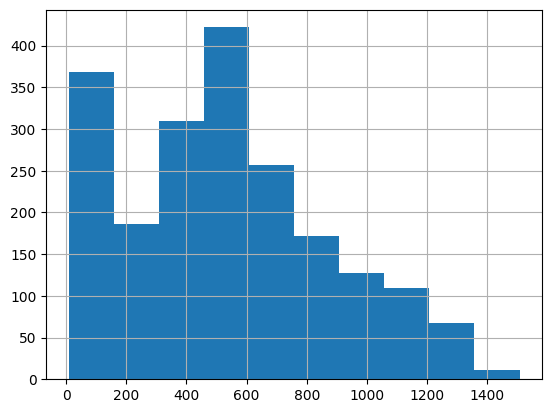

In [36]:
df_train['paragraph_len'].hist()

In [31]:
df_test['paragraph_len'] = [len(tokenizer.tokenize(x)) for x in df_test['paragraph']]

In [35]:
df_test['paragraph_len'].describe()

count     869.000000
mean      635.850403
std       527.426624
min        11.000000
25%       206.000000
50%       499.000000
75%       874.000000
max      2076.000000
Name: paragraph_len, dtype: float64

<Axes: >

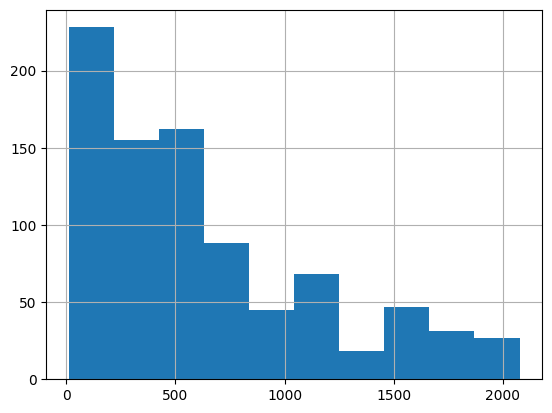

In [37]:
df_test['paragraph_len'].hist()

###  case 1. 600 이하 토큰의 질문에 대해서만 retrive된 정보 추가하여 실험 진행